In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import os

Import and init data 

In [3]:
df_covid_infection = pd.read_excel("./data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Veckodata Riket")

df_covid_infection.info()

PLOT_IMAGE_PATH = "./visualiseringar/covid/"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              143 non-null    int64  
 1   veckonummer                     143 non-null    int64  
 2   Antal_fall_vecka                143 non-null    int64  
 3   Antal_fall_100000inv_vecka      143 non-null    int64  
 4   Antal_fall_100000inv_14dagar    143 non-null    int64  
 5   Kum_antal_fall                  143 non-null    int64  
 6   Kum_fall_100000inv              143 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  143 non-null    int64  
 8   Kum_antal_intensivvårdade       143 non-null    int64  
 9   Antal_avlidna_vecka             143 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    143 non-null    float64
 11  Kum_antal_avlidna               143 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      143 

In [4]:
df_covid_infection.describe()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,143.000000,143.000000,143.000000,143.000000,143.000000,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,2020.965035,26.153846,18274.300699,176.195804,352.153846,1.135693e+06,10943.510490,66.986014,6028.790210,144.783217,13.984615,12381.041958,1193.605589
std,0.799759,14.249442,38453.510497,370.571566,723.518879,9.664583e+05,9309.894482,73.195665,3084.134001,173.014008,16.734208,6123.669647,589.225121
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,3080.000000,30.000000,60.500000,1.028910e+05,996.000000,14.000000,2648.500000,27.000000,2.600000,5884.000000,569.750000
50%,2021.000000,26.000000,5442.000000,52.000000,107.000000,1.087272e+06,10475.000000,28.000000,7565.000000,82.000000,7.900000,14619.000000,1408.500000
75%,2022.000000,38.000000,20968.000000,202.000000,419.500000,2.437980e+06,23489.000000,109.000000,8907.000000,181.000000,17.500000,17427.500000,1679.049988
max,2022.000000,53.000000,265043.000000,2554.000000,5024.000000,2.613225e+06,25177.000000,289.000000,9579.000000,664.000000,64.300003,20704.000000,1994.699951


In [5]:
df_covid_infection.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


In [6]:
# show index
df_covid_infection.index

RangeIndex(start=0, stop=143, step=1)

In [7]:
df_covid_infection.value_counts()

år    veckonummer  Antal_fall_vecka  Antal_fall_100000inv_vecka  Antal_fall_100000inv_14dagar  Kum_antal_fall  Kum_fall_100000inv  Antal_nyaintensivvårdade_vecka  Kum_antal_intensivvårdade  Antal_avlidna_vecka  Antal_avlidna_milj_inv_vecka  Kum_antal_avlidna  Kum_antal_avlidna_milj_inv
2020  6            1                 0                           0                             1               0                   0                               0                          0                    0.000000                      0                  0.000000                      1
2021  51           27907             269                         505                           1288255         12412               56                              8208                       44                   4.200000                      15303              1474.400024                   1
      45           5819              56                          105                           1184405         11411             

# Slå ihop kolumnerna
<p>
och skapa en ny kolumn som heter vecka

</p>

In [5]:
df_covid_infection["vecka"] = df_covid_infection["år"].astype(str) + "v" + df_covid_infection["veckonummer"].astype(str)
 
# drop columns år and veckonummer
df_covid_infection.drop(columns=["år", "veckonummer"], inplace=True)

# move column vecka to first position
col_vecka = df_covid_infection.pop("vecka")
df_covid_infection.insert(0, col_vecka.name, col_vecka)

df_covid_infection.head()

,vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.0


In [6]:
def sns_plot_line_chart(data, x: str, y: str, title: str, file_path: str) -> None:
    """
        Plot bar chart
        param df: pandas dataframe
        param x: x axis
        param y: y axis
        param title: chart title
        param file_path: file path to save chart
        """
    plt.figure(figsize=(20, 10))
    sns.lineplot(data=data, x=x, y=y)
    plt.title(title)
    plt.xticks(rotation=90)
    # save chart as png in output directory
    plt.savefig(os.path.join(file_path, title + '.png'))
    plt.show()


def px_plot_line_chart(data, x: str, y: str, title: str, file_path: str)-> None:
    """
        Plot bar chart
        param df: pandas dataframe
        param x: x axis
        param y: y axis
        param title: chart title
        param file_path: file path to save chart
        """
    fig = px.line(data, x=x, y=y, title=title)
    fig.show()
    # save chart as png in output directory
    fig.write_image(os.path.join(file_path, title + '.png'))
    

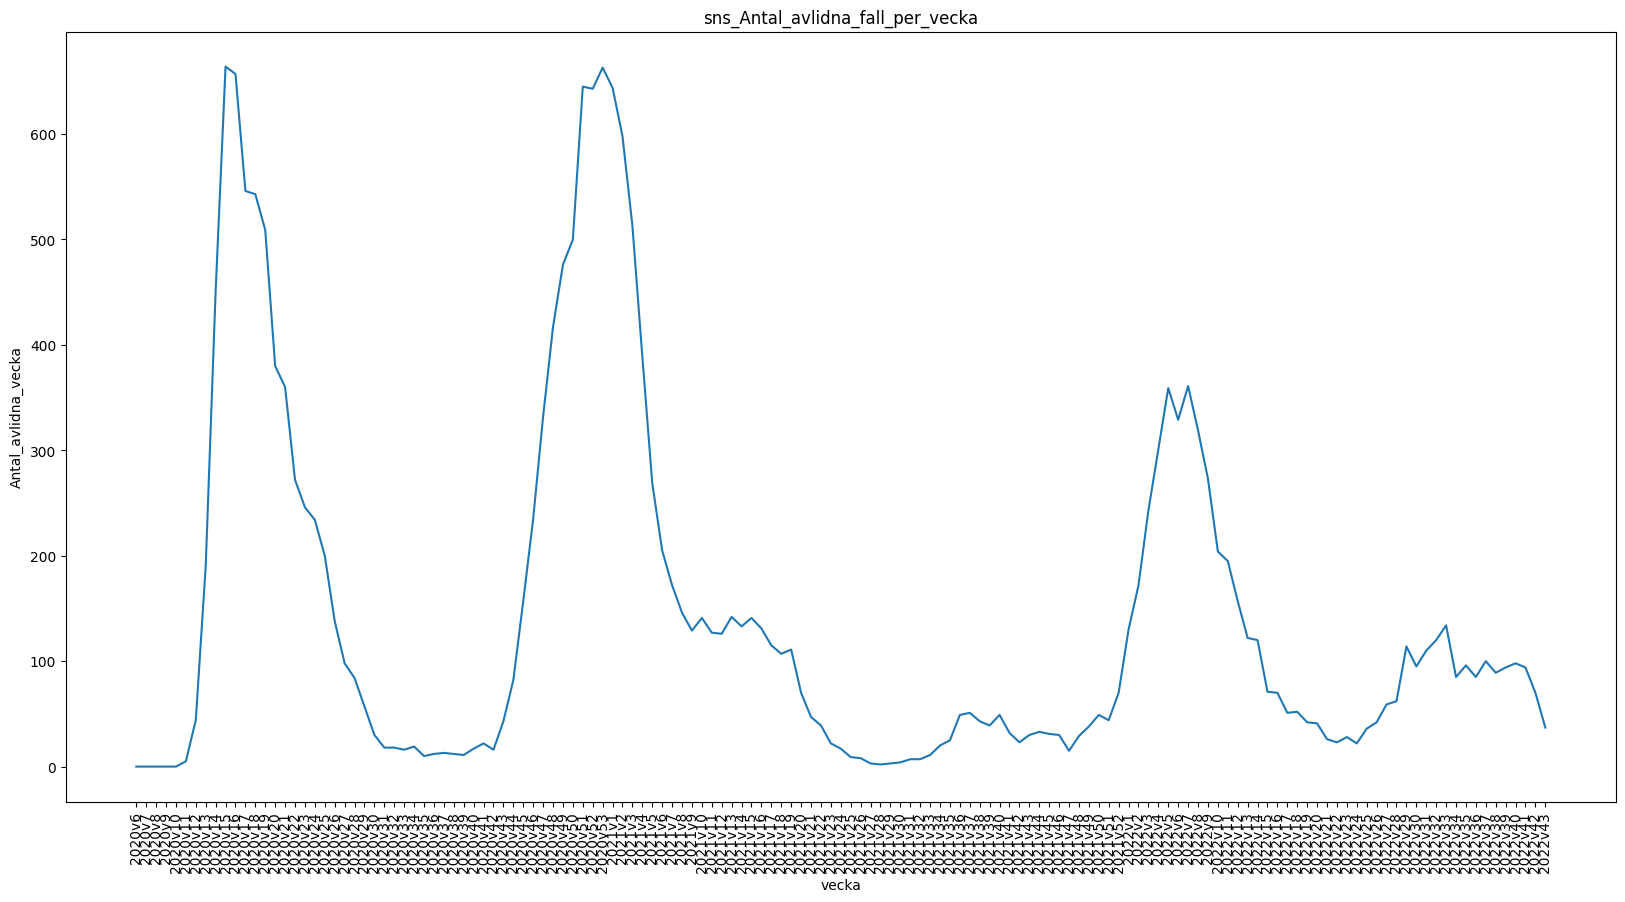

In [7]:
sns_plot_line_chart(df_covid_infection, "vecka", "Antal_avlidna_vecka", "sns_Antal_avlidna_fall_per_vecka", PLOT_IMAGE_PATH)
px_plot_line_chart(df_covid_infection, "vecka", "Antal_avlidna_vecka", "px_Antal_avlidna_fall_per_vecka", PLOT_IMAGE_PATH)

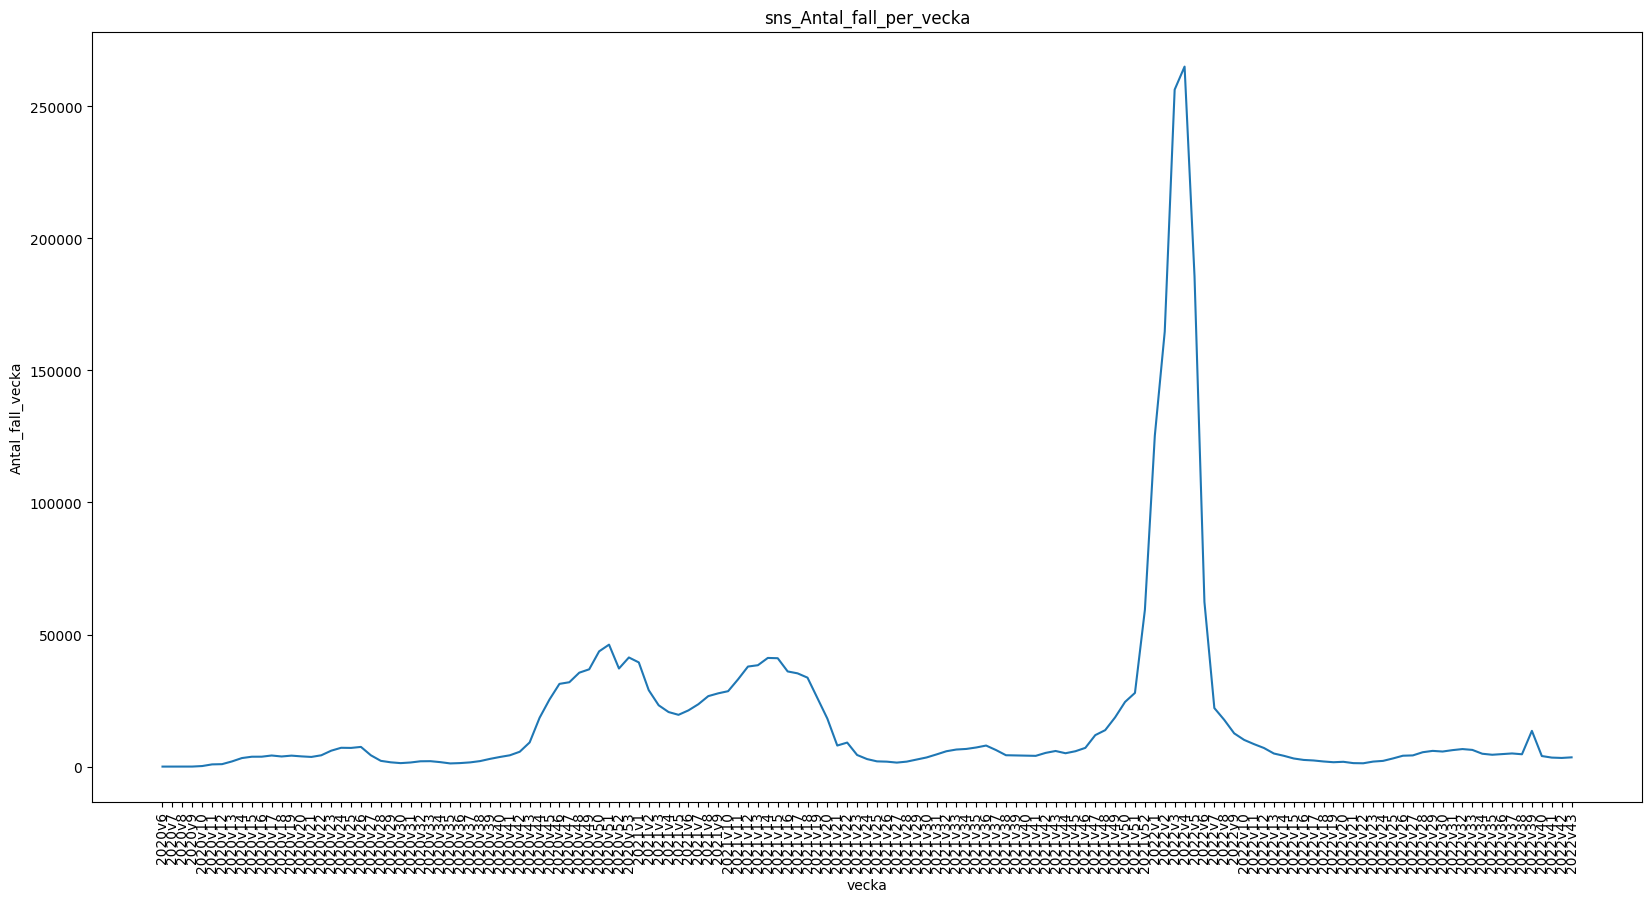

In [8]:
sns_plot_line_chart(df_covid_infection, "vecka", "Antal_fall_vecka", "sns_Antal_fall_per_vecka", PLOT_IMAGE_PATH)
px_plot_line_chart(df_covid_infection, "vecka", "Antal_fall_vecka", "px_Antal_fall_per_vecka", PLOT_IMAGE_PATH)

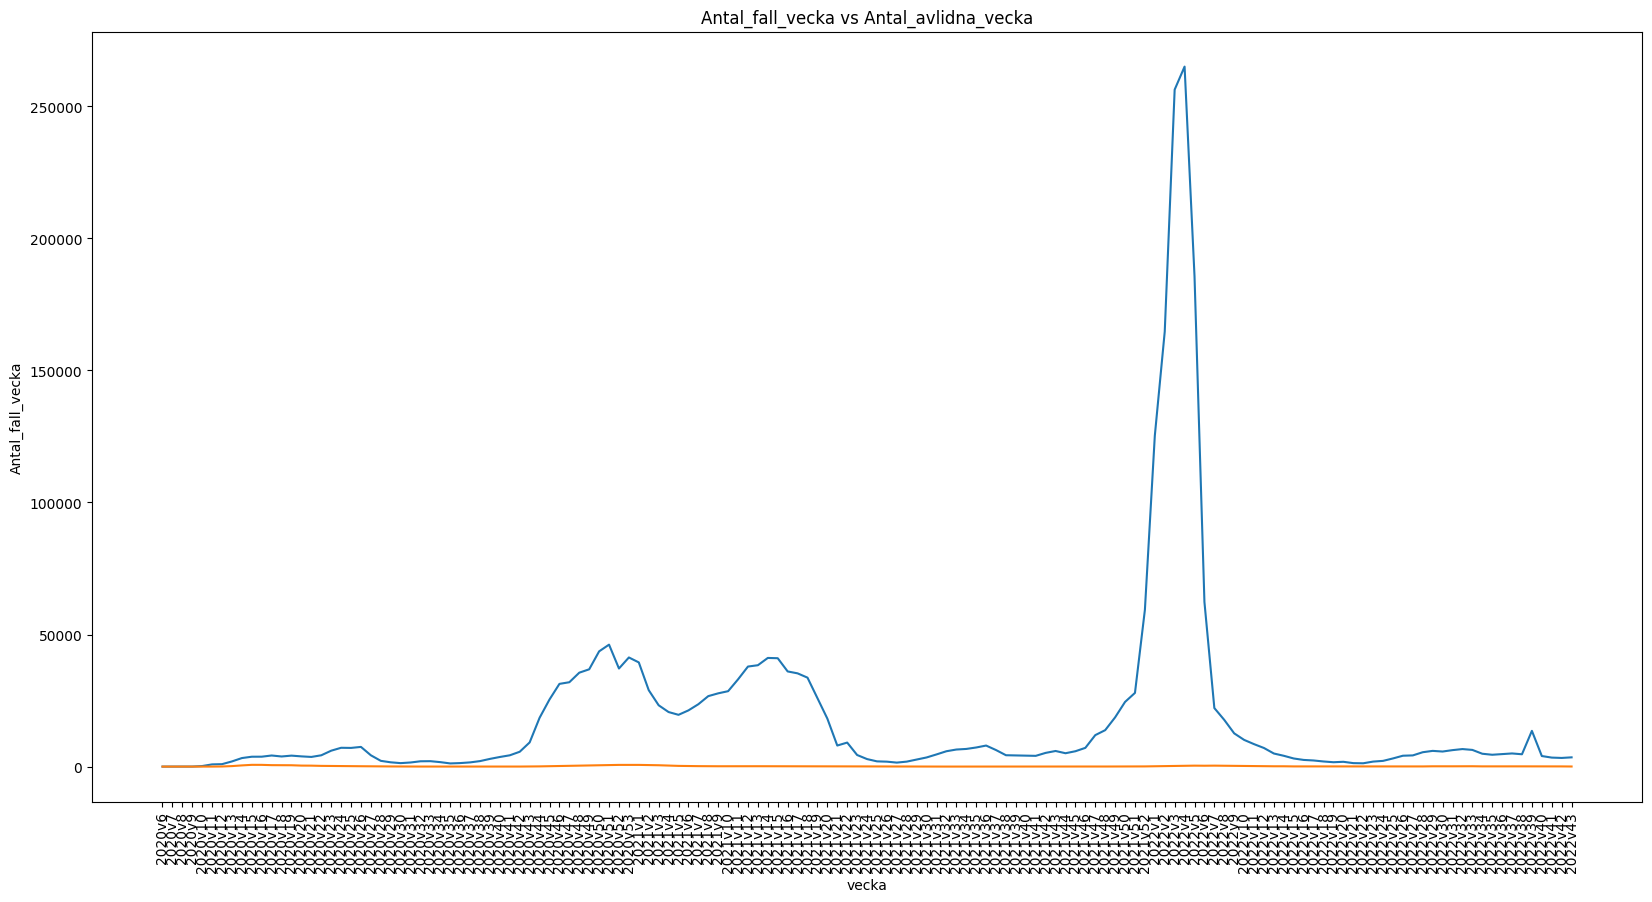

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_covid_infection, x="vecka", y="Antal_fall_vecka")
sns.lineplot(data=df_covid_infection, x="vecka", y="Antal_avlidna_vecka")
plt.title("Antal_fall_vecka vs Antal_avlidna_vecka")
plt.xticks(rotation=90)
plt.show()
plt.savefig(os.path.join(PLOT_IMAGE_PATH, "Antal_fall_vecka vs Antal_avlidna_vecka" + '.png'))

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_covid_infection["vecka"], y=df_covid_infection["Antal_fall_vecka"], name="Antal_fall_vecka"))
fig.add_trace(go.Scatter(x=df_covid_infection["vecka"], y=df_covid_infection["Antal_avlidna_vecka"], name="Antal_avlidna_vecka"))
fig.update_layout(title="Antal_fall_vecka vs Antal_avlidna_vecka", xaxis_title="vecka", yaxis_title="Antal_fall_vecka vs Antal_avlidna_vecka")
fig.show()
fig.write_image(os.path.join(PLOT_IMAGE_PATH, "Antal_fall_vecka vs Antal_avlidna_vecka" + '.png'))


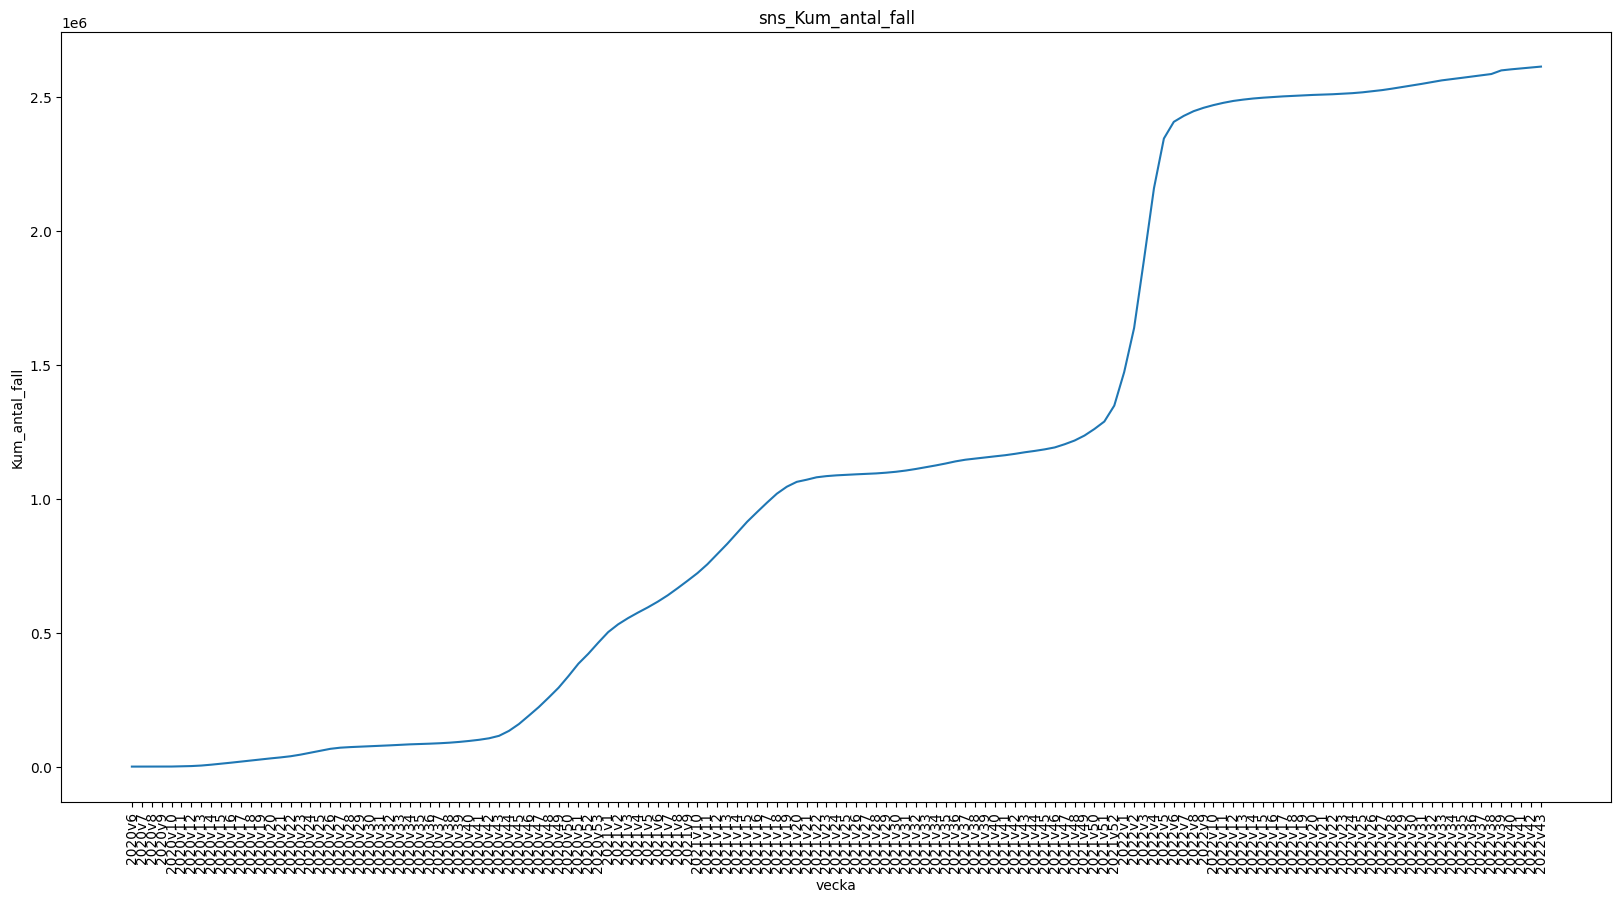

In [10]:
sns_plot_line_chart(df_covid_infection, "vecka", "Kum_antal_fall", "sns_Kum_antal_fall", PLOT_IMAGE_PATH)
px_plot_line_chart(df_covid_infection, "vecka", "Kum_antal_fall", "px_Kum_antal_fall", PLOT_IMAGE_PATH)